In [88]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-03-11 00:27:02,318 | INFO     |: Already connected to a BLE device


In [114]:
ble.send_command(CMD.START_PID, "0.0|304") 

2025-03-11 00:44:19,164 | INFO     |: Disconnected from C0:83:24:6C:39:3C


In [103]:

time_data = []
tof_1 = []
kp_pwm = []
error_val = []
tof_2 = []

time_data.clear()
tof_1.clear()
tof_2.clear()
kp_pwm.clear()
error_val.clear()

# print(len(time_data))
# print(len(tof_1))
# print(len(kp_pwm))
# print(len(error_va/[]l))



count = 0


def notif_PID_data(uuid, byte_array):
    global time_data
    global tof_1
    global kp_pwm
    global error_val
    global target_dist
    global kp_val
    

    global count

    string = ble.bytearray_to_string(byte_array)
    data = string.split("|")
    
    # Convert the string values to floats and append to the lists
    time_data.append(int(data[0]))  # Convert the first value to int for time
    tof_2.append(float(data[1]))  # Convert tof to float
    kp_pwm.append(float(data[2]))  # Convert kp_pwm to float
    error_val.append(float(data[3]))  # Convert error_val to float
    target_dist = float(data[4])
    kp_val = float(data[5])

    count = 50

    # print("count: ", count)



In [104]:
ble.start_notify(ble.uuid['RX_STRING'], notif_PID_data)
ble.send_command(CMD.SEND_PID_CONTROL_DATA, "")

In [105]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [106]:
print(kp_val)

0.15


In [107]:
print(len(time_data))
print(len(tof_1))
print(len(kp_pwm))
print(len(error_val))

6
0
6
6


In [108]:
print(target_dist)

304.0


In [109]:
print(kp_val)

0.15


In [110]:
print(kp_pwm)

[-44.25, -44.25, -44.25, -44.25, -44.25, -44.25]


In [111]:
print(error_val)

[-295.0, -295.0, -295.0, -295.0, -295.0, -295.0]


In [112]:
print(tof_1)

[]


In [113]:
print(tof_2)

[125.0, 125.0, 125.0, 125.0, 125.0, 125.0]


In [68]:
print(time_data)

[665568, 665579, 665590, 665601, 665616, 665626, 665636, 665646, 665656, 665667, 665678, 665689, 665700, 665711, 665726, 665731, 665742, 665749, 665770, 665780, 665785, 665800, 665805, 665810, 665821, 665827, 665838, 665849, 665860, 665874, 665879, 665893, 665904, 665921, 665932]


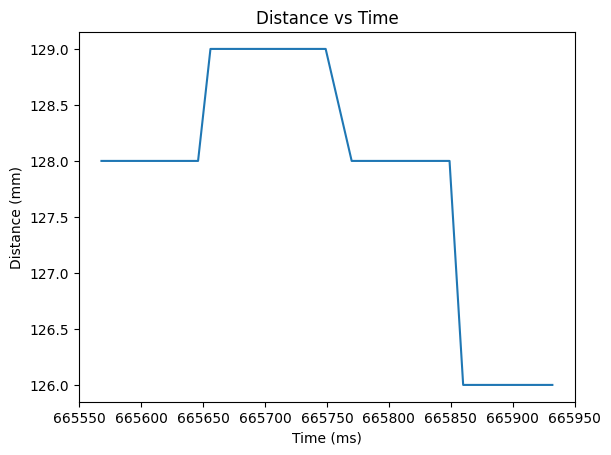

In [69]:
import matplotlib.pyplot as plt

# Plot the distance vs time
plt.plot(time_data, tof_1)
plt.xlabel('Time (ms)')

plt.ylabel('Distance (mm)')
plt.title('Distance vs Time')
plt.show()

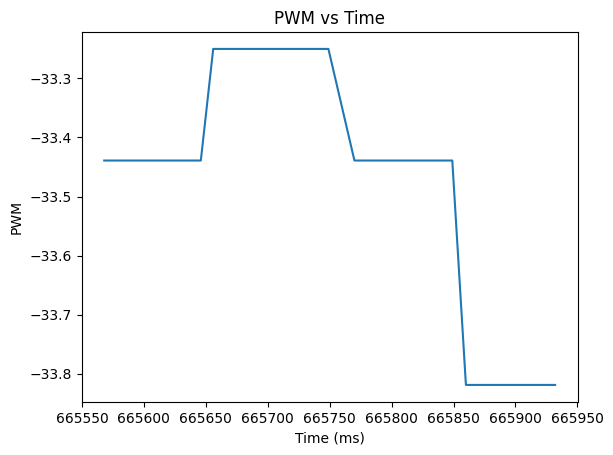

In [70]:
import matplotlib.pyplot as plt

# Plot the pwm vs time
plt.plot(time_data, kp_pwm)
plt.xlabel('Time (ms)')

plt.ylabel('PWM')
plt.title('PWM vs Time')
plt.show()